08/03/22

Author: Amalia Karalis

Collabs: Maude Lariviere, Ana Hoban, Jasmine Parsons

This code was heavily based on the code for diffusion on mycourses. 

If we consider only the x component of the momentum equation ($u_y = 0$), considering that we have incompressible flow with no pressure:
$$ \frac{\partial u}{\partial t} = \nu \frac{\partial^2u}{\partial x^2} + g sin\alpha $$

We can solve the diffusion part of the equation seperate from the gravity:

The diffusion equation:
$$ \frac{\partial u}{\partial t} = \nu \frac{\partial^2u}{\partial x^2}$$
and we use the same method to solve as in Example 4 from the notes.

We can then add the gravity term to the resulting u:
$$ \frac{\partial u}{\partial t} = g sin\alpha $$
$$ u = g sin\alpha dt $$

In class, we found the analytic solution for the velocity field of lava flowing down an inclined plane:
$$u_x = -\frac{g sin\alpha}{\nu} \left(\frac{y^2}{2} - Hy\right)$$
where g is positive.

We can use code similar to that used in class for solving the diffusion equation, but in our case we have an extra term (the gravity term).

<IPython.core.display.Javascript object>


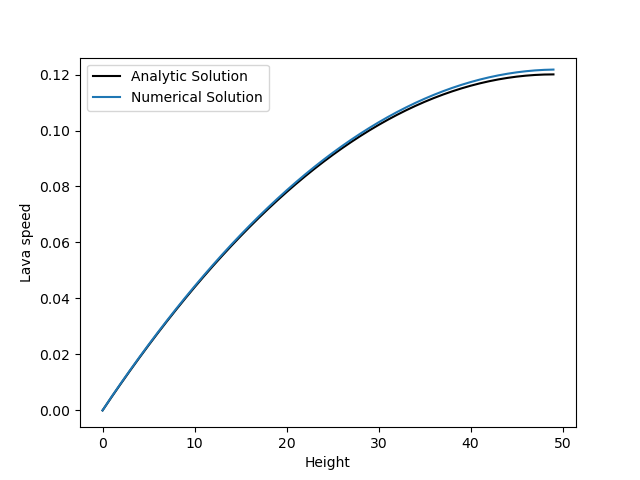

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

# set up the grid and parameters
Ngrid = 50
Nsteps = 5000

dt = 2 # need dt <= (dy**2)/v and dt <= dy/u for convergence ("Courant" condition)
dy = 1

v = 0.5 # diffusion
alpha = np.pi/6

beta = v*dt/dy**2

y = np.arange(0, Ngrid*1., dy) # set the ys, where 0 is the ground and y_max=Ngrid is the lava-air interface
u_numerical = np.zeros(len(y)) # initialize u so that every point along y has the same velocity (u=0)
H = max(y)

g = 0.0001 # we take g to be small so it has the same order of magnitude as our other parameters

# for later when we add in gravity
grav = np.zeros(Ngrid)+(g*np.sin(alpha))
grav[0] = 0 # from the no-slip boundary condition, the first element of the velocity is always 0

## analytic solution
u_analytic = -g*np.sin(alpha)/v * (y**2 / 2 - H*y)

# set up plot
plt.ion()
fig = plt.figure()

# plotting analytic solution for reference
plt.plot(y, u_analytic, color='black', label='Analytic Solution') # y is on the x-axis, u is on the y-axis

# setting up the plotting objects that will be updated
plt1, = plt.plot(y, u_numerical, label='Numerical Solution')

fig.canvas.draw()

# the matrix for the diffusion operator
A = np.eye(Ngrid) * (1.0 + 2.0 * beta) + np.eye(Ngrid, k=1) * -beta + np.eye(Ngrid, k=-1) * -beta

# implementing the boundary conditions
# no slip boundary condition
A[0][0] = 1.0
A[0][1] = 0

# no stress boundary condition
A[Ngrid - 1][Ngrid - 1] = 1.0 + beta

for i in range(Nsteps):
    # solve
    u_numerical = np.linalg.solve(A, u_numerical)
    
    # add in the gravity
    u_numerical += grav*dt
    
    plt1.set_ydata(u_numerical) # update the velocities
    plt.legend()
    plt.ylabel('Lava speed')
    plt.xlabel('Height')
    fig.canvas.draw()
    plt.pause(0.01)